

---

**UNIVERSITE NUMERIQUE CHEIKH HAMIDOU KANE**

 **FORMATIONS SCIENCES EMERGENTES**

**MASTER BIG DATA ANALYTICS**



---
**Les Encadreurs :**

Pr OUSMANE SALL [Responsable de la Formation Big Data Analytics & Vice-Recteur de l'UNCHK](https://www.linkedin.com/in/ousmane-sall-a2140825/)

M. Abdourahmane BALDE [PhD Student](https://www.linkedin.com/in/abdourahmane-balde-862936167/)


**Les Etudiants:**

1. Mariama BARRY [Etudiant en Big Data Analytics](https://www.linkedin.com/in/mariama-barry-982b852a9/)
2. Mohamed KEBE [Etudiant en Big Data Analytics](https://www.linkedin.com/in/mohamed-kebe-51b021202/)
3. Papa Seydou WANE [Etudiant en Big Data Analytics](https://www.linkedin.com/in/papa-seydou-wane-37abaa1a1/)

**DOCUMENTATION :** [Annotation d'un jeu de données d'images microscopiques de frottis sanguins provenant de patients atteints de drépanocytose.ipynb](https://colab.research.google.com/drive/1zClEEwQK3rGBc0jAVgoksonloQtxU1hC?authuser=2#scrollTo=chI20FeiwECr&line=24&uniqifier=1)



---



# **Annotation d'un jeu de données d'images microscopiques de frottis sanguins provenant de patients atteints de drépanocytose**

La drépanocytose est une maladie génétique affectant l'hémoglobine, conduisant à une déformation des globules rouges.

Les globules rouges normaux ont une forme de disque biconcave qui leur permet de circuler facilement à travers les vaisseaux sanguins. Cependant, en raison de la présence de l'hémoglobine S, les globules rouges des personnes atteintes de drépanocytose peuvent se déformer et prendre une forme de faucille ou de croissant lorsqu'ils sont privés d'oxygène ou exposés à des conditions de stress. Cette déformation rend les globules rouges rigides et moins capables de circuler efficacement dans les vaisseaux sanguins.


Pour diagnostiquer cette condition, l'analyse d'images de frottis sanguins microscopiques est cruciale. Cependant, cette tâche nécessite une annotation précise des images pour former des modèles d'intelligence artificielle capables d'identifier les caractéristiques distinctives de la maladie. Dans ce projet, nous avons acquis un jeu de données d'images de frottis sanguins provenant de patients atteints de drépanocytose. Nous avons ensuite suivi un processus en deux étapes pour annoter et analyser ces images.



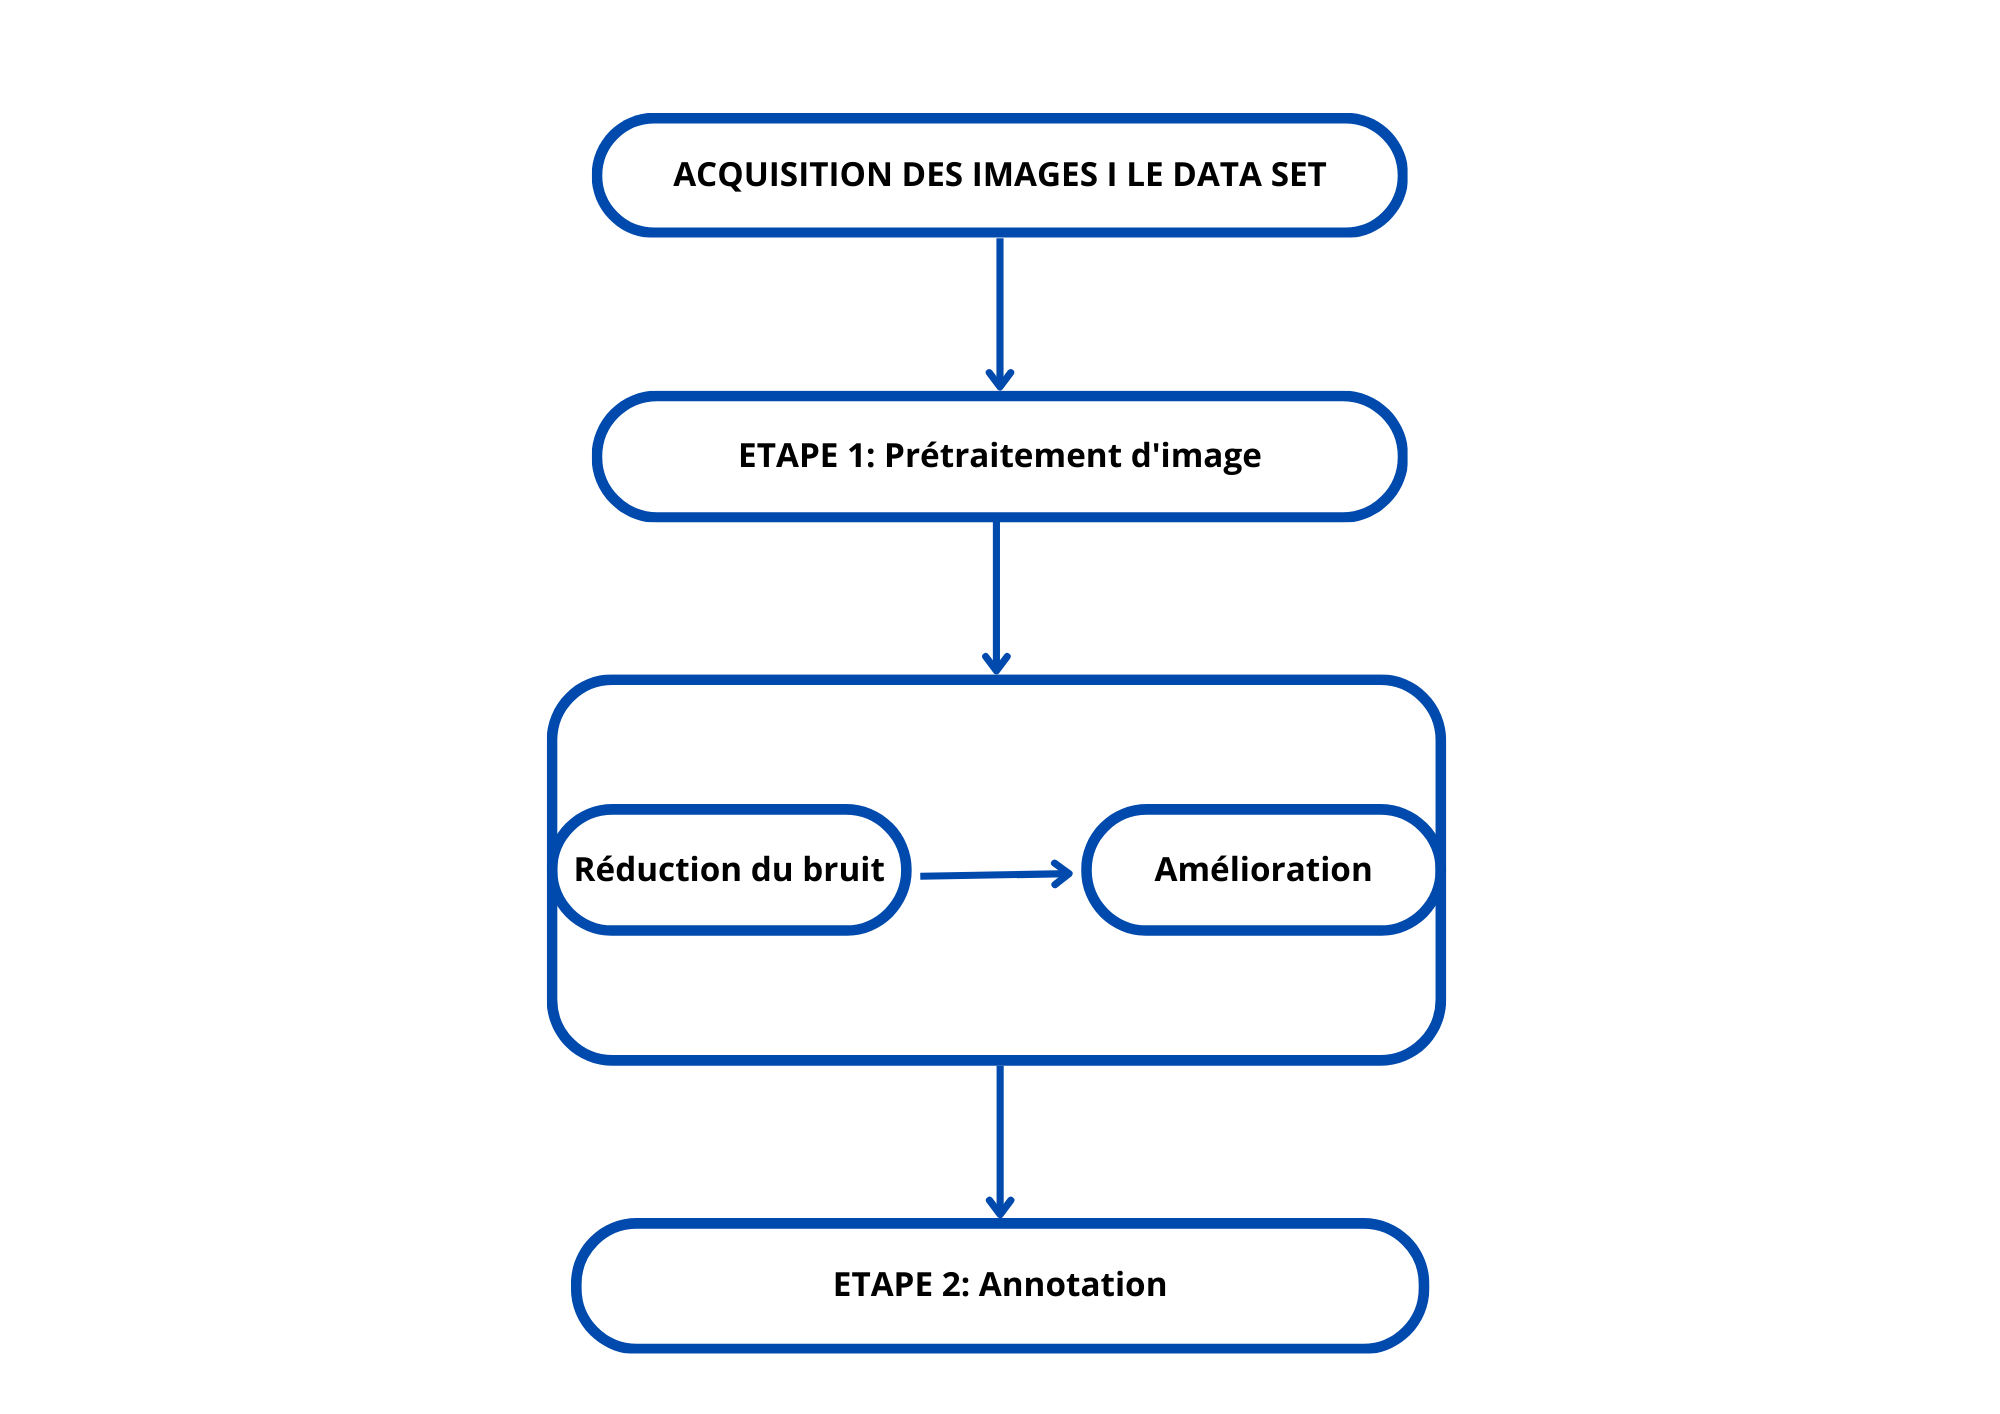

# I. ACQUISITION DE LA BASE DE DONNEES


Nous avons une base de données privées composées de 106 images images microscopiques de frottis sanguins provenant de patients atteints de drépanocytose.


# II. PRE-TRAITEMENT DES DONNEES

## 0. Connexion de Colab et du **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Chargement des Bibliothéques

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt


## 2. Conversion en niveaux de gris

Cette étape nous permet de visualiser visuellement l'effet de la conversion en niveaux de gris sur l'image d'origine, tout en quantifiant le temps nécessaire pour cette opération. Cela nous aide à mieux comprendre les performances de notre algorithme de traitement d'image et à optimiser le processus si nécessaire.

Temps d'exécution de la conversion en niveaux de gris : 0.026830196380615234 secondes


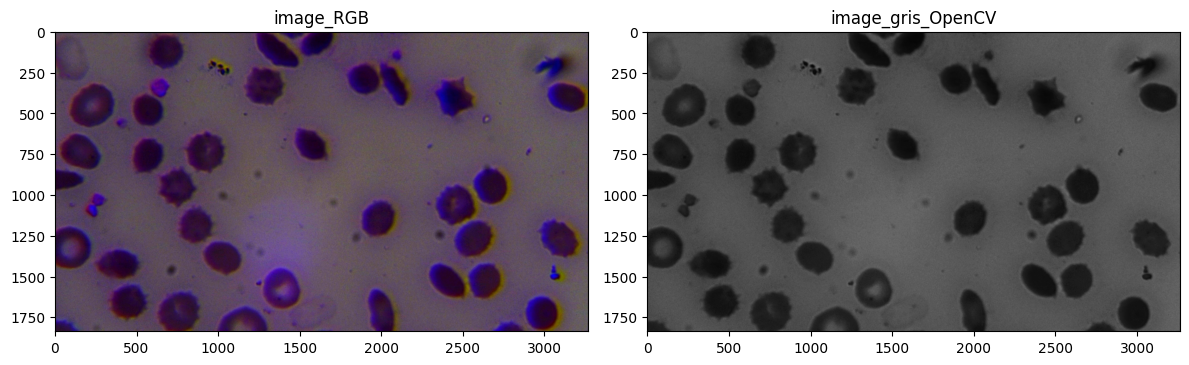

In [ ]:
# chargement de l'image
image = cv2.imread("/content/drive/MyDrive/Projet_Big_Data/Data_set /Opta-Tech_338.jpg")

# Evaluation du temps d'exécution
start_time = time.time()

# Convertir l'image en niveau de gris
image_gris_opencv = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Afficher le temps d'exécution
print("Temps d'exécution de la conversion en niveaux de gris : %s secondes" % (time.time() - start_time))

# Affichage des images
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('image_RGB')

ax2.imshow(cv2.cvtColor(image_gris_opencv, cv2.COLOR_BGR2RGB))
ax2.set_title('image_gris_OpenCV')

fig.tight_layout()
plt.show()

## 3. Réduction du bruit

### Les METRIQUES

Nous avons utilisé quatres 4 métriques pour évaluer l'efficacité de notre algorithme de débruitage.
Ces métriques nous permettent d'évaluer objectivement la qualité des images débruitées et de comparer différents algorithmes de débruitage pour choisir celui qui donne les meilleurs résultats pour notre application spécifique de détection de la drépanocytose.
Nous avons:

1. **MSE (Mean Squared Error - Erreur quadratique moyenne)** :
   - L'erreur quadratique moyenne mesure la moyenne des carrés des différences pixel à pixel entre l'image d'origine et l'image débruitée. Plus le MSE est faible, plus l'image débruitée est proche de l'image d'origine.


```
           # mse = np.mean((img - denoised_img) ** 2)
```



2. **PSNR (Peak Signal-to-Noise Ratio - Rapport signal sur bruit maximal)** :
   - Le PSNR mesure la qualité de l'image débruitée en comparant le niveau maximal de signal à la puissance du bruit de l'image. Il est exprimé en décibels (dB) et plus la valeur de PSNR est élevée, meilleure est la qualité de l'image débruitée.


```
            # psnr = cv2.PSNR(img, denoised_img)
```



3. **MAE (Mean Absolute Error - Erreur absolue moyenne)** :
   - L'erreur absolue moyenne est la moyenne des valeurs absolues des différences pixel à pixel entre l'image d'origine et l'image débruitée. Comme pour le MSE, un MAE plus faible indique une meilleure performance de débruitage.



```
            # mae = np.mean(np.abs(img - denoised_img))
```



4. **MSSIM (Mean Structural Similarity Index - Indice de similarité structurelle moyen)** :
   - Le MSSIM mesure la similarité structurelle entre deux images. Il évalue la qualité de l'image débruitée en tenant compte de la luminance, du contraste et de la structure. Un MSSIM proche de 1 indique une forte similarité structurelle entre les images.


```
            # ssim_score, _ = ssim(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY), full=True)

```



Dans notre code, nous avons calculé ces métriques pour chaque image débruitée en utilisant l'algorithme de débruitage gaussien et l'algorithme de débruitage médian. Ensuite, nous avons calculé les moyennes de ces métriques sur toutes les images débruitées pour évaluer globalement les performances des deux algorithmes de débruitage.



### Application du filtre gaussien



Le filtre gaussien fonctionne en convoluant l'image avec un noyau gaussien. Ce noyau est une fonction gaussienne bidimensionnelle qui est utilisée pour pondérer les pixels de l'image.
Les principaux paramètres de ce filtre sont la taille du noyau et l'écart-type. La taille du noyau contrôle la taille de la zone sur laquelle l'effet de lissage est appliqué, tandis que l'écart-type contrôle la quantité de flou appliquée à l'image.

In [ ]:
def denoise_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialisation des totaux pour les métriques
    total_mse = 0
    total_psnr = 0
    total_mae = 0
    total_mssim = 0  # Ajout de la variable pour MSSIM

    # Boucle sur toutes les images dans le dossier d'entrée
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Application du filtre gaussien
            denoised_img = cv2.GaussianBlur(img, (5, 5), 0)  # Taille du noyau (5x5) et écart-type (0)

            # Enregistrement de l'image débruitée
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, denoised_img)

            # Calcul de l'erreur quadratique moyenne (MSE)
            mse = np.mean((img - denoised_img) ** 2)

            # Calcul du PSNR (Peak Signal-to-Noise Ratio)
            psnr = cv2.PSNR(img, denoised_img)

            # Calcul de l'erreur absolue moyenne (MAE)
            mae = np.mean(np.abs(img - denoised_img))

            # Calcul du MSSIM (Mean Structural Similarity Index)
            ssim_score, _ = ssim(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY), full=True)

            # Affichage des métriques pour chaque image
            print(f"{filename} débruitée et enregistrée avec succès.")
            print(f"MSE: {mse:.2f}, PSNR: {psnr:.2f}, MAE: {mae:.2f}, MSSIM: {ssim_score:.2f}\n")

            # Ajout des métriques aux totaux
            total_mse += mse
            total_psnr += psnr
            total_mae += mae
            total_mssim += ssim_score

    # Calcul des moyennes des métriques sur toutes les images
    num_images = len([filename for filename in os.listdir(input_folder) if filename.endswith('.jpg')])
    avg_mse_gaussien = total_mse / num_images
    avg_psnr_gaussien = total_psnr / num_images
    avg_mae_gaussien = total_mae / num_images
    avg_mssim_gaussien = total_mssim / num_images

    print(f"MSE moyen: {avg_mse_gaussien:.2f}")
    print(f"PSNR moyen: {avg_psnr_gaussien:.2f}")
    print(f"MAE moyen: {avg_mae_gaussien:.2f}")
    print(f"MSSIM moyen: {avg_mssim_gaussien:.2f}")


# Chemins d'accès aux dossiers d'entrée et de sortie
input_folder = '/content/drive/MyDrive/Projet_Big_Data/Data_set '
output_folder = '/content/drive/MyDrive/Projet_Big_Data/Filtre_gaussien'

# Appeler la fonction pour débruitage et évaluation des images
denoise_images(input_folder, output_folder)


Opta-Tech_466.jpg débruitée et enregistrée avec succès.
MSE: 0.86, PSNR: 48.78, MAE: 67.66, MSSIM: 0.99

Opta-Tech_449.jpg débruitée et enregistrée avec succès.
MSE: 0.72, PSNR: 49.56, MAE: 62.22, MSSIM: 0.99

Opta-Tech_459.jpg débruitée et enregistrée avec succès.
MSE: 0.74, PSNR: 49.43, MAE: 63.30, MSSIM: 0.99

Opta-Tech_465.jpg débruitée et enregistrée avec succès.
MSE: 0.65, PSNR: 50.00, MAE: 59.49, MSSIM: 0.99

Opta-Tech_461.jpg débruitée et enregistrée avec succès.
MSE: 0.84, PSNR: 48.88, MAE: 67.11, MSSIM: 0.99

Opta-Tech_469.jpg débruitée et enregistrée avec succès.
MSE: 0.86, PSNR: 48.71, MAE: 67.92, MSSIM: 0.99

Opta-Tech_446.jpg débruitée et enregistrée avec succès.
MSE: 0.78, PSNR: 49.21, MAE: 64.56, MSSIM: 0.99

Opta-Tech_467.jpg débruitée et enregistrée avec succès.
MSE: 0.83, PSNR: 48.92, MAE: 66.53, MSSIM: 0.99

Opta-Tech_439.jpg débruitée et enregistrée avec succès.
MSE: 0.74, PSNR: 49.44, MAE: 63.45, MSSIM: 0.99

Opta-Tech_474.jpg débruitée et enregistrée avec succès.

## Application du filtre Médian

Le filtre médian consiste à parcourir l'image pixel par pixel et à remplacer la valeur de chaque pixel par la valeur médiane des pixels voisins définis par une fenêtre de taille spécifique (par exemple, une fenêtre de 3x3 ou 5x5).
Il est particulièrement efficace pour supprimer les pixels aberrants ou les impulsions dans une image, car il remplace les valeurs aberrantes par des valeurs plus représentatives de leur voisinage.

In [ ]:
def denoise_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    #Initialisation
    total_mse = 0
    total_psnr = 0
    total_mae = 0
    total_mssim = 0  # Nouvelle métrique MSSIM

    #Boucle sur toutes les images dans le dossier d'entrée
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Le filtre médian
            denoised_img = cv2.medianBlur(img, 5)

            # Sauvegarde des images débruitées
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, denoised_img)

            #Calcul de MSE
            mse = np.mean((img - denoised_img) ** 2)

            #Calcul du PSNR
            psnr = cv2.PSNR(img, denoised_img)

            #Calcul de MAE
            mae = np.mean(np.abs(img - denoised_img))

            # Calcul de MSSIM
            ssim_score, _ = ssim(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY), full=True)

            # Affichage des métriques pour chaque image
            print(f"{filename} débruitée et enregistrée avec succès.")
            print(f"MSE: {mse:.2f}, PSNR: {psnr:.2f}, MAE: {mae:.2f}, MSSIM: {ssim_score:.2f}\n")

            # Ajout des métriques aux totaux
            total_mse += mse
            total_psnr += psnr
            total_mae += mae
            total_mssim += ssim_score

    # Calcul des moyennes des métriques sur toutes les images
    num_images = len([filename for filename in os.listdir(input_folder) if filename.endswith('.jpg')])
    avg_mse_median = total_mse / num_images
    avg_psnr_median = total_psnr / num_images
    avg_mae_median = total_mae / num_images
    avg_mssim_median = total_mssim / num_images

    print(f"MSE moyen: {avg_mse_median:.2f}")
    print(f"PSNR moyen: {avg_psnr_median:.2f}")
    print(f"MAE moyen: {avg_mae_median:.2f}")
    print(f"MSSIM moyen: {avg_mssim_median:.2f}")


# Chemins d'accès aux dossiers d'entrée et de sortie
input_folder = r'/content/drive/MyDrive/Projet_Big_Data/Data_set '
output_folder = r'/content/drive/MyDrive/Projet_Big_Data/Filtre_median'

# Appel de la fonction
denoise_images(input_folder, output_folder)


Opta-Tech_466.jpg débruitée et enregistrée avec succès.
MSE: 1.68, PSNR: 45.88, MAE: 78.20, MSSIM: 0.98

Opta-Tech_449.jpg débruitée et enregistrée avec succès.
MSE: 1.37, PSNR: 46.76, MAE: 74.52, MSSIM: 0.98

Opta-Tech_459.jpg débruitée et enregistrée avec succès.
MSE: 1.40, PSNR: 46.66, MAE: 74.97, MSSIM: 0.98

Opta-Tech_465.jpg débruitée et enregistrée avec succès.
MSE: 1.20, PSNR: 47.35, MAE: 71.24, MSSIM: 0.99

Opta-Tech_461.jpg débruitée et enregistrée avec succès.
MSE: 1.68, PSNR: 45.87, MAE: 78.59, MSSIM: 0.98

Opta-Tech_469.jpg débruitée et enregistrée avec succès.
MSE: 1.69, PSNR: 45.86, MAE: 78.45, MSSIM: 0.98

Opta-Tech_446.jpg débruitée et enregistrée avec succès.
MSE: 1.49, PSNR: 46.38, MAE: 76.19, MSSIM: 0.98

Opta-Tech_467.jpg débruitée et enregistrée avec succès.
MSE: 1.63, PSNR: 46.01, MAE: 77.82, MSSIM: 0.98

Opta-Tech_439.jpg débruitée et enregistrée avec succès.
MSE: 1.41, PSNR: 46.63, MAE: 75.00, MSSIM: 0.98

Opta-Tech_474.jpg débruitée et enregistrée avec succès.

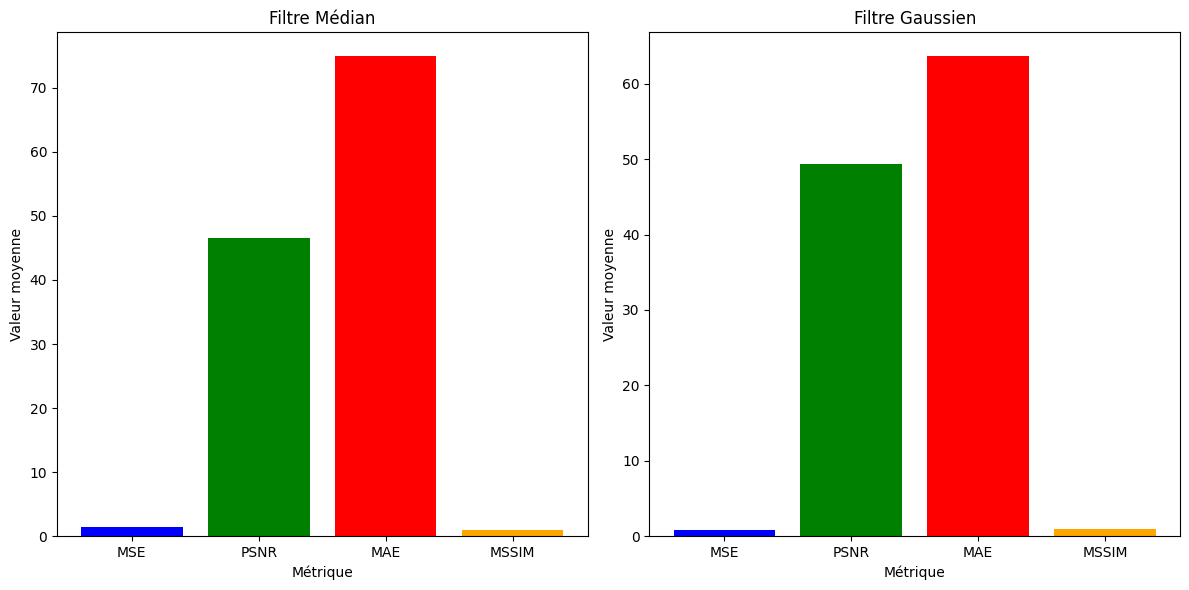

In [ ]:
def plot_metrics_comparison(avg_metrics_median, avg_metrics_gaussian):
    metrics = ['MSE', 'PSNR', 'MAE', 'MSSIM']

    # Valeurs moyennes pour le filtre médian
    avg_values_median = list(avg_metrics_median.values())

    # Valeurs moyennes pour le filtre gaussien
    avg_values_gaussian = list(avg_metrics_gaussian.values())

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Diagramme pour le filtre médian
    axs[0].bar(metrics, avg_values_median, color=['blue', 'green', 'red', 'orange'])
    axs[0].set_title('Filtre Médian')
    axs[0].set_xlabel('Métrique')
    axs[0].set_ylabel('Valeur moyenne')

    # Diagramme pour le filtre gaussien
    axs[1].bar(metrics, avg_values_gaussian, color=['blue', 'green', 'red', 'orange'])
    axs[1].set_title('Filtre Gaussien')
    axs[1].set_xlabel('Métrique')
    axs[1].set_ylabel('Valeur moyenne')

    plt.tight_layout()
    plt.show()

# Résultats pour le filtre médian
avg_metrics_median = {'MSE': 1.44, 'PSNR': 46.59, 'MAE': 74.90, 'MSSIM': 0.98}

# Résultats pour le filtre gaussien
avg_metrics_gaussian = {'MSE': 0.76, 'PSNR': 49.34, 'MAE': 63.64, 'MSSIM': 0.99}

# Appel de la fonction pour tracer les diagrammes de comparaison
plot_metrics_comparison(avg_metrics_median, avg_metrics_gaussian)


Après avoir analysé les résultats, nous constatons que le filtre gaussien semble produire des résultats légèrement meilleurs dans l'ensemble.

# III. ANNOTATION

L'annotation d'image est le processus de marquage ou d'étiquetage d'images avec des métadonnées descriptives ou des balises pour les rendre compréhensibles par des algorithmes informatiques. Cela implique souvent l'identification et la catégorisation des objets, des actions, des scènes ou d'autres caractéristiques présentes dans une image. Les annotations d'images sont largement utilisées dans des domaines tels que la vision par ordinateur, l'apprentissage automatique et la reconnaissance d'objets, où des ensembles de données étiquetés sont nécessaires pour entraîner des modèles d'intelligence artificielle à reconnaître et à comprendre les images. Les annotations peuvent être effectuées manuellement par des humains, automatiquement par des algorithmes, ou une combinaison des deux. Il existe plusieurs plateformes d'annotation d'images, chacune avec ses propres forces et faiblesses.

## 1. MORPHOLOGIE DES CELLULES A ANNOTES

Les personnes atteintes de drépanocytose forment une hémoglobine anormale (hémoglobine drépanocytaire, HbS), qui a tendance à former des fibrilles en cas de manque d'oxygène. Les globules rouges sont déformés par les fibres contenues dans des structures en forme de croissant, s'agglutinent et obstruent les petits vaisseaux sanguins, provoquant une inflammation.

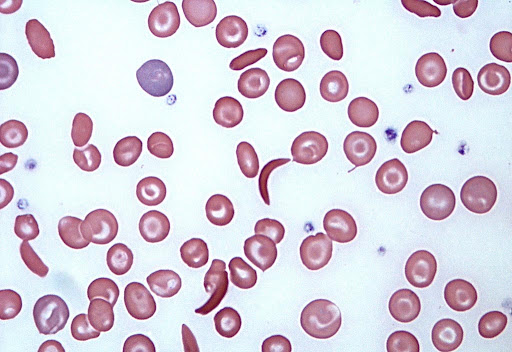

## 2. ETUDE COMPARATIVE

En se basant sur les besoins spécifiques du projet dans le domaine de la vision par ordinateur pour la détection des globules rouges dans les frottis sanguins de patients atteints de drépanocytose, voici une comparaison plus précise entre Labelbox,VGG Image Annotator (VIA), Amazon SageMaker Ground Truth, MakeSense.ai et Roboflow :

### Labelbox :
Force :

•	Interface utilisateur conviviale et intuitive.

•	Prise en charge de divers types d'annotations comme les boîtes englobantes, les masques  sémantiques, etc.

•	Fonctionnalités avancées telles que le suivi d'objets, la segmentation vidéo, etc.

Faiblesses:

•	Les fonctionnalités avancées peuvent être complexes pour les utilisateurs novices.

•	Coût élevé pour les grands volumes d'annotations.


### VGG Image Annotator (VIA) :

Force :

•	Gratuit et open-source.

•	Léger et facile à déployer.

•	Prise en charge de divers formats d'exportation.

Faiblesses :

•	Interface utilisateur moins raffinée par rapport à d'autres plateformes commerciales.

•	Manque de fonctionnalités avancées telles que le suivi d'objets.


### Amazon SageMaker Ground Truth :

Forces :

•	Intégration transparente avec Amazon Web Services (AWS).

•	Capacité à créer des modèles de machine learning directement à partir des annotations.

•	Fonctionnalités de qualité de données intégrées.

Faiblesses :

•	Coût élevé, surtout si vous utilisez d'autres services AWS en même temps.

•	Dépendance à l'écosystème AWS.


### Roboflow:
   - Avantages :
     - Plateforme tout-en-un : Roboflow offre une suite complète d'outils pour la gestion des données, la préparation des données et l'annotation, ce qui en fait une solution pratique pour les projets de vision par ordinateur, y compris l'annotation des globules rouges.
     - Flexibilité des formats : Roboflow prend en charge de nombreux formats d'images et de modèles de détection d'objets, offrant une grande flexibilité pour travailler avec différents types de données, ce qui peut être utile pour les images médicales variées.
     - Intégration avec des outils populaires : Roboflow peut être intégré avec des frameworks de vision par ordinateur populaires tels que TensorFlow, PyTorch, etc., ce qui facilite l'utilisation des données annotées dans le processus d'entraînement de modèles pour la détection des globules rouges.

   - Inconvénients :
     - Certaines fonctionnalités avancées peuvent nécessiter un abonnement payant.
     - L'interface peut sembler complexe pour les débutants par rapport à d'autres outils plus simples.


### MakeSense.ai:
   - Avantages :
     - Interface conviviale : MakeSense.ai offre une interface conviviale et intuitive, adaptée aux débutants, ce qui facilite le processus d'annotation pour les utilisateurs sans expertise technique approfondie.
     - Externalisation de l'annotation : MakeSense.ai permet d'externaliser le processus d'annotation à une communauté d'annotateurs en ligne, ce qui peut être utile pour gérer un grand nombre d'images ou pour les projets nécessitant des annotations spécialisées, comme dans le cas de la détection des globules rouges dans la drépanocytose.
     - Gestion des données : MakeSense.ai propose des fonctionnalités de gestion des données pour organiser et gérer facilement les ensembles de données annotés.
  
- Incovenients :
     - Certaines fonctionnalités avancées peuvent être limitées par rapport à des plateformes plus complètes comme Roboflow.
     - L'externalisation de l'annotation peut entraîner des coûts supplémentaires en fonction du nombre d'images à annoter.


## ETUDE COMPARATIVE EN PROFONDEUR


Nous avons choisi de travailler avec MakeSense.ai et Roboflow, nous allons étudié chacune de ces technologies en profondeur pour voir laquelle serait plus adapté à notre projet.

#### Présentation de l'interface de Roboflow




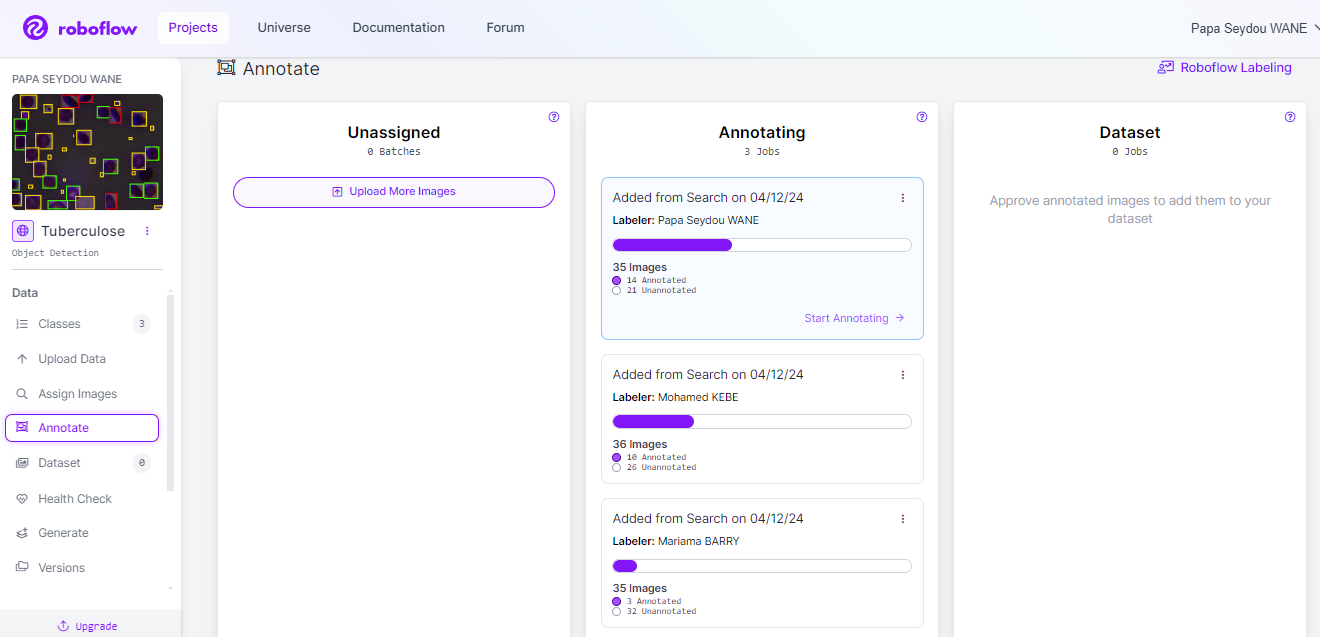

Avec Roboflow nous avons la possibilité d'assigner à chaque memebre du groupes des images à annoter.

Nous avons la possibilté de procéder aux Conversions de formats de vision par ordinateur les plus populaires
Nous avons la possibilité d'exporter notre ensemble de données sous forme de fichier .zip ou de lien de téléchargement curl. ChoisirBoîtes englobantes orientées YOLOv8 ou d'autres formats disponibles sur la liste déroulante.



##### YOLO

La détection d'objets est une tâche cruciale en vision par ordinateur, avec des applications allant de la surveillance et des véhicules autonomes à l'imagerie médicale et à l'analyse de la vente au détail. YOLO (You Only Look Once) est une famille populaire d'algorithmes de détection d'objets en temps réel connus pour leur efficacité et leur efficacité.

YOLOv9 est la dernière itération de la série YOLO, offrant une précision et une vitesse améliorées par rapport à ses prédécesseurs. En entraînant YOLOv9 sur un ensemble de données personnalisé, vous pouvez lui apprendre à reconnaître des objets spécifiques pertinents pour votre application.

La collecte et l'étiquetage de votre ensemble de données constituent la première étape de la formation de YOLOv9 sur un ensemble de données personnalisé. Cela implique de collecter des images pertinentes pour votre tâche de détection d'objets et de les annoter avec des cadres de délimitation. Divers outils tels que LabelImg, VIA et LabelMe peuvent vous aider dans ce processus, vous permettant de marquer les coordonnées du cadre de délimitation de chaque objet.

